<a href="https://colab.research.google.com/github/Vergaraagustin/DataScience/blob/main/PrimeraEntrega_Vergara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo: Predicciones para tarjetas de credito.

\
**Introducción:**
---
El trabajo está orientado a poder conocer los motivos por el cual los clientes abandonan las tarjetas de distintos bancos.

Para esto se utilizará un set de datos recopilado por distintos bancos, en donde principalmente los datos los diferenciamos en el estado del cliente.

El dataset cuenta con gran catidad de variables sobre los clientes, limites de credito, el uso en los ultimos 12 meses, ingresos, trasacciones, cantidad de transacciones. Que nos ayuda mucho al estudio del data set.

El dataset utilizado nos permitirá además poder conocer la población de los clientes distinguiendolos por sexo, nivel de educacion, edad, categoria de cliente.

\
**Variables:**
---
Los datos provienen de la pagina kaggle, fueron extraídos y subidos a una carpeta en google Drive. Donde será cargado a Colab por medio de la url.

CLIENTNUM: Identificador para cada cliente.

Attrition_Flag: Estado del cliente.

Customer_Age: Edad del cliente.

Género: Género del cliente.

Dependent_count: Número de dependientes que tiene el cliente.
          
Education_Level: Nivel de educación del cliente.

Marital_Status: Estado civil del cliente.

Categoría_de_ingresos: Categoría de ingresos del cliente.

Card_Category: Tipo de tarjeta que posee el cliente.

Months_on_book: Tiempo ha estado el cliente en los libros.

Total_Relationship_Count: Relaciones que el cliente tiene con el proveedor de la tarjeta de crédito.

Months_Inactive_12_mon: número de meses que el cliente ha estado inactivo en los últimos doce meses.

Contacts_Count_12_mon: Número de contactos que ha tenido el cliente en los últimos doce meses.

Credit_Limit: límite de crédito del cliente.

Total_Revolving_Bal: Saldo total revolvente del cliente.

Avg_Open_To_Buy: promedio de apertura para comprar del cliente.

Total_Amt_Chng_Q4_Q1: Importe total cambiado del trimestre 4 al trimestre 1.
          
Total_Trans_Amt: Importe total de la transacción.

Total_Trans_Ct: Recuento total de transacciones.
          
Total_Ct_Chng_Q4_Q1: El recuento total cambió del trimestre 4 al trimestre 1.

Avg_Utilization_Ratio: Indice de utilización promedio del cliente.

\
**Objetivos:** 
---
1. Los objetivos especificos son hacer un estudio que especifique las diferecias entre los generos. 
2. Ver las probabilidades de un aumento de categorias para los clientes con mayores recursos. 
3. Verificar cuales son los clinetes de potencial abandono para no perder clientes o darles mejores propuestas. 

###Importaciones y carga de dataset

In [32]:
# Como siempre primero todas las librerías necesarias
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
sns.set_style('whitegrid')

In [33]:
url = "https://raw.githubusercontent.com/Vergaraagustin/DataScience/main/BankChurners%20(1).csv"
df = pd.read_csv(url,sep=',', header=0)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [34]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


###Renombrar columnas.
Se realiza el cambio de nombres a las columnas muy extensas para un mejor trabajo

In [35]:
#df.columns = df.columns.str.strip().str.replace(' ','_')
df = df.rename(columns={"CLIENTNUM": "Client","Attrition_Flag": "State","Customer_Age" : "Age","Dependent_count" : "Depen_Cnt","Education_Level": "Edu_Lvl","Marital_Status": "Mari_Status","Income_Category" : "Income" ,"Card_Category" : "Card_Ctg","Total_Relationship_Count" : "Ttl_Relat_Cnt","Months_Inactive_12_mon" : "Month_Inac","Contacts_Count_12_mon" : "Contac_Cnt","Total_Revolving_Bal" : "Ttl_Revol", "Avg_Utilization_Ratio": "Avg_Util_Ratio","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1" : "NaiveBayes_Clasif1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2" : "NaiveBayes_Clasif2"})
df.head()

,Client,State,Age,Gender,Depen_Cnt,Edu_Lvl,Mari_Status,Income,Card_Ctg,Months_on_book,...,Credit_Limit,Ttl_Revol,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Util_Ratio,NaiveBayes_Clasif1,NaiveBayes_Clasif2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


###Limpieza de datos.
Se le realizo limpieza, se eliminan columnas que no seran utilizadas. No se encontraron nulls que rellenar para el estudio.

In [36]:
print(df.isnull().sum())

Client                  0
State                   0
Age                     0
Gender                  0
Depen_Cnt               0
Edu_Lvl                 0
Mari_Status             0
Income                  0
Card_Ctg                0
Months_on_book          0
Ttl_Relat_Cnt           0
Month_Inac              0
Contac_Cnt              0
Credit_Limit            0
Ttl_Revol               0
Avg_Open_To_Buy         0
Total_Amt_Chng_Q4_Q1    0
Total_Trans_Amt         0
Total_Trans_Ct          0
Total_Ct_Chng_Q4_Q1     0
Avg_Util_Ratio          0
NaiveBayes_Clasif1      0
NaiveBayes_Clasif2      0
dtype: int64


In [37]:
df = df.drop(["NaiveBayes_Clasif1","NaiveBayes_Clasif2"], axis =1)

###Estudio diferenciado por genero.
Se realizara un estudio estadistico comparando los dos generos teniendo en cuenta las distintas variables/parametros, donde utilizaremos las distintas categorias, limites crediticios, transancciones, catidad de transacciones y por ultimo el ingreso de sus salarios.

Preguntas de interes:

1. Esta bien marcado el sesgo de genero?
2. Cual de los dos genereos tienen mejores condiciones?
3. En cuales variables hay mas diferencias?

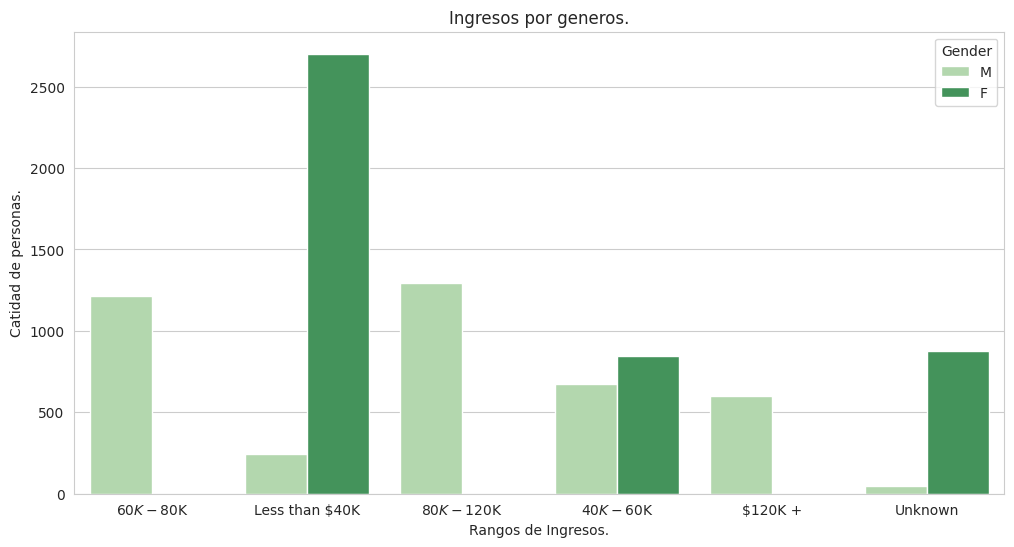

In [38]:
datos = df[['Income','Gender','State']].query('State == "Existing Customer"')

v1 = plt.figure(figsize=(12,6))
v1 = sns.countplot(x='Income', data=datos ,palette='Greens',hue='Gender');
v1 = plt.title('Ingresos por generos.')
v1 = plt.xlabel('Rangos de Ingresos.')
v1 = plt.ylabel('Catidad de personas.')



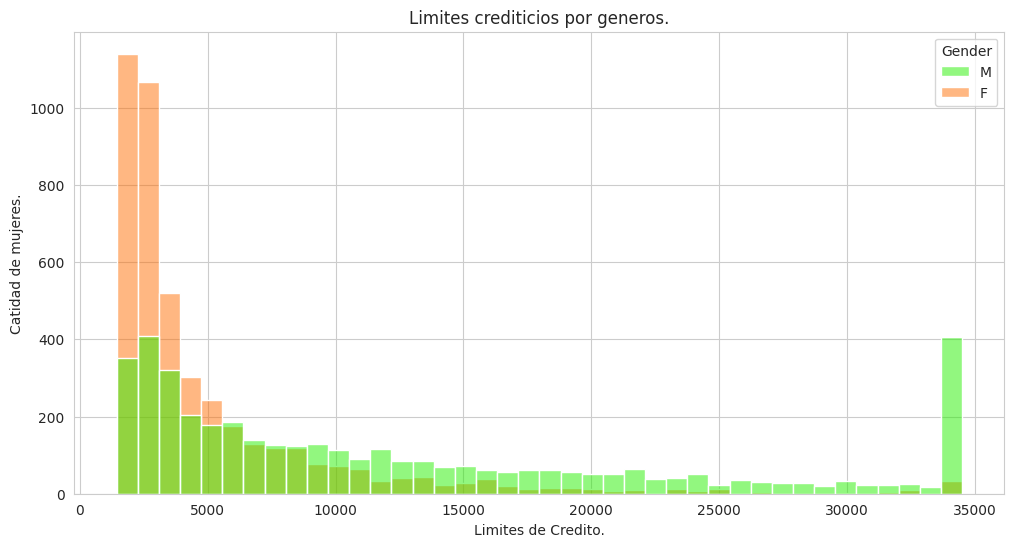

In [39]:
datos2 = df[['Credit_Limit','Gender','State']].query('State == "Existing Customer"')
v2 = plt.figure(figsize=(12,6))
v2 = sns.histplot(x='Credit_Limit', data=datos2 ,palette='gist_ncar',hue='Gender');
v2 = plt.title('Limites crediticios por generos.')
v2 = plt.xlabel('Limites de Credito.')
v2 = plt.ylabel('Catidad de mujeres.')

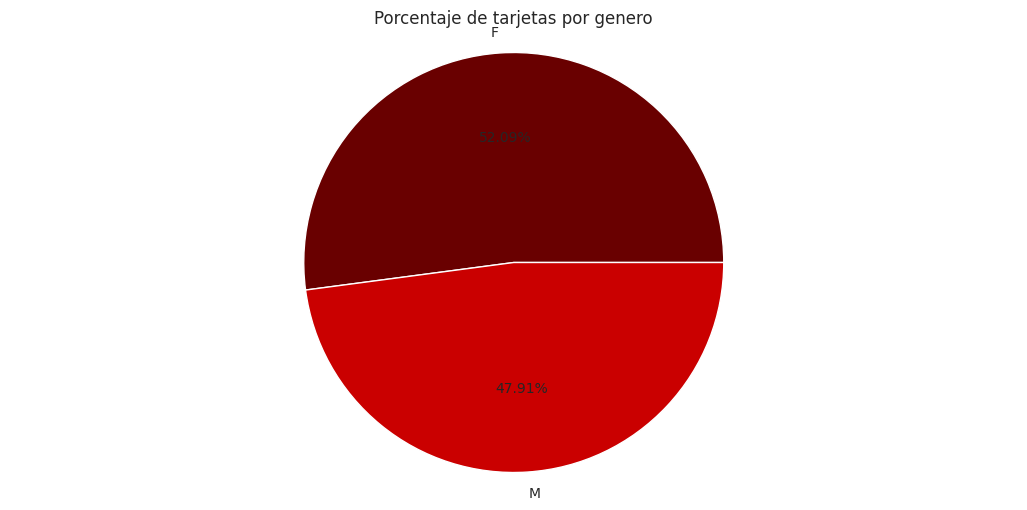

In [40]:
gender_exist = df[['Gender','State']].query('State == "Existing Customer"')
gender_counts = gender_exist['Gender'].value_counts()
v3 = plt.subplots(figsize=(13,6))
v3 = plt.pie(gender_counts.values, labels= gender_counts.index, autopct='%1.2f%%')
v3 = plt.axis('equal')
v3 = plt.title('Porcentaje de tarjetas por genero')
plt.show()

Observamos que:

*   La mayoria de los datos que tenemos son de mujeres. 
*   Los rangos de menores ingresos son de mujeres, en un rango que varia desde ingresos menores de 40mil hasta 60mil.
*   Las mujeres son las que menor limite de credito tienen y un pequeño grupo ronda en los limite de creditos maximos.




###Incremento de categoria.
Veremos si a los clientes se les puede conceder un incremento de categoria, tomarremos como parametros a estudiar los ingresos, nivel de educacion por si hay posible incremento de ingreso futuro, los clientes que tengan mayor cantidad de transacciones y/o montos de transancciones tendran un plus por buen uso de tarjeta.

Preguntas de interes:

1. Cuales clientes pueden tener incremento de categoría?
2. Que promedio de ingresos tiene cada categoría?
3. Los clientes que tienen categorías altas son los que más utilizan las tarjetas?
4. Hay algún dato que delimite las categorías?


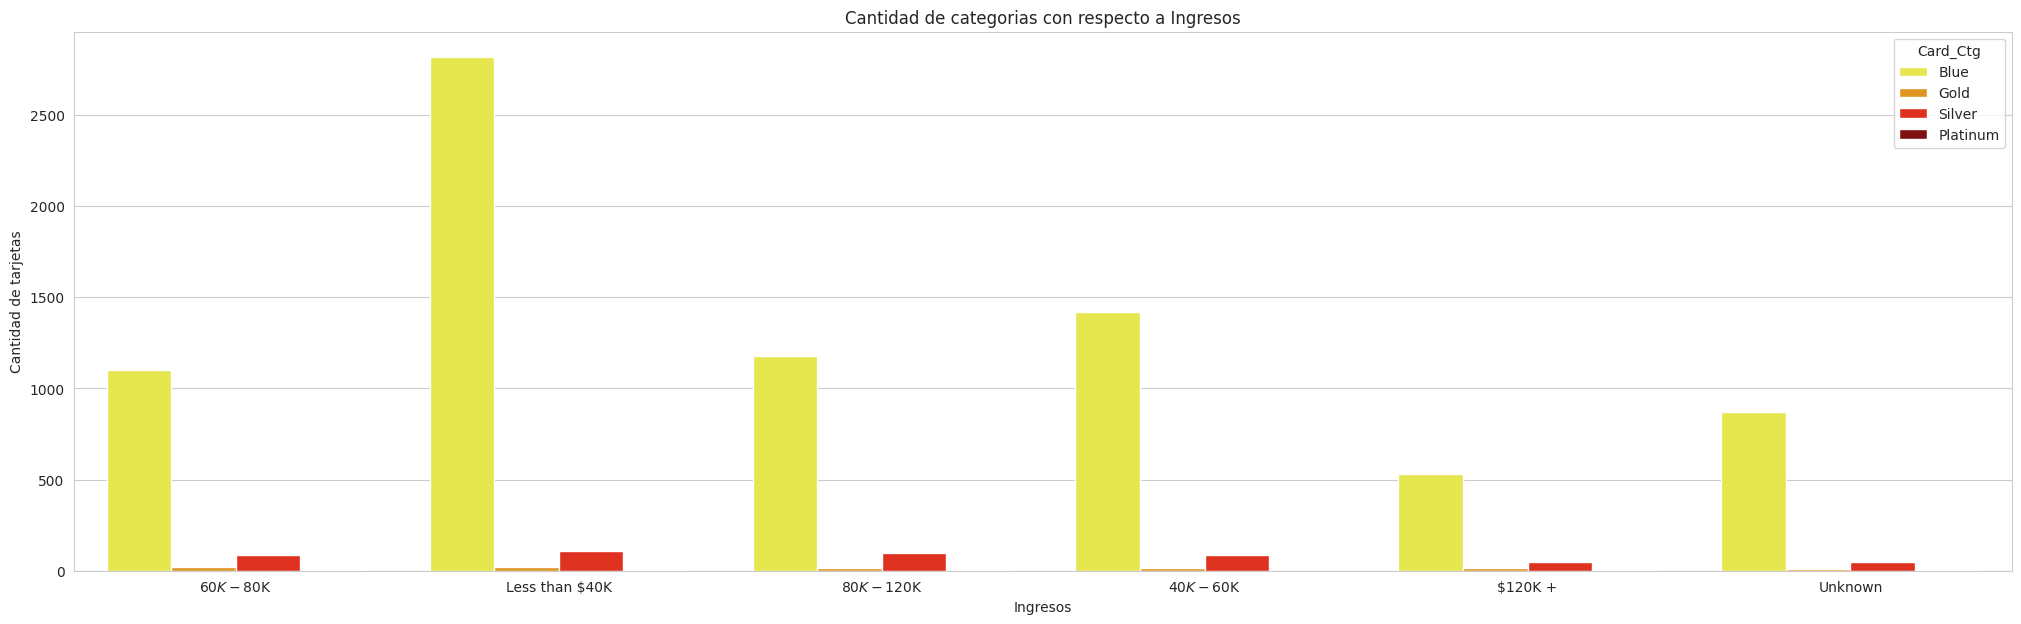

In [41]:
card_income = df[['Card_Ctg','State','Income']].query('State == "Existing Customer"')
v4 = fig, ax = plt.subplots(figsize=(25,7))
v4 = sns.countplot(x='Income', data=card_income ,palette='hot_r',hue='Card_Ctg');
v4 = ax.set_title('Cantidad de categorias con respecto a Ingresos')
v4 = ax.set_xlabel('Ingresos')
v4 = ax.set_ylabel('Cantidad de tarjetas')
v4 = plt.show()

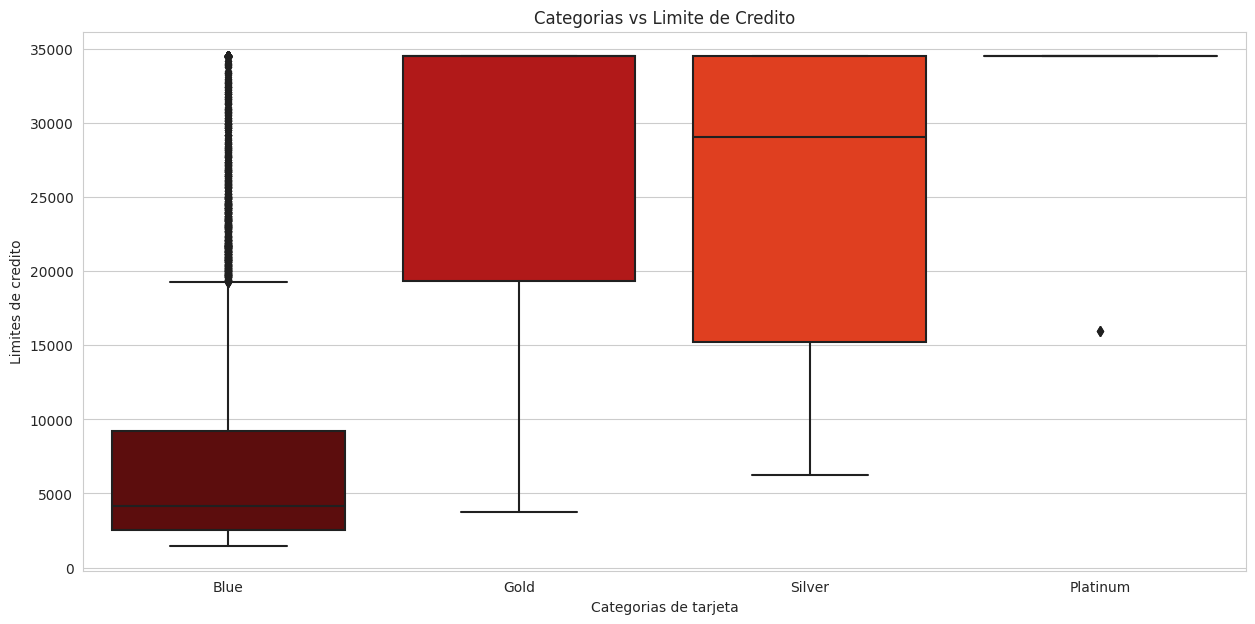

In [42]:
card = df[['Card_Ctg','State','Credit_Limit']].query('State == "Existing Customer"')
v5 = fig, ax = plt.subplots(figsize=(15,7))
v5 = sns.boxplot(data=card , y = card['Credit_Limit'], x = card['Card_Ctg'])
v5 = ax.set_title('Categorias vs Limite de Credito')
v5 = ax.set_xlabel('Categorias de tarjeta')
v5 = ax.set_ylabel('Limites de credito')
v5 = plt.show()

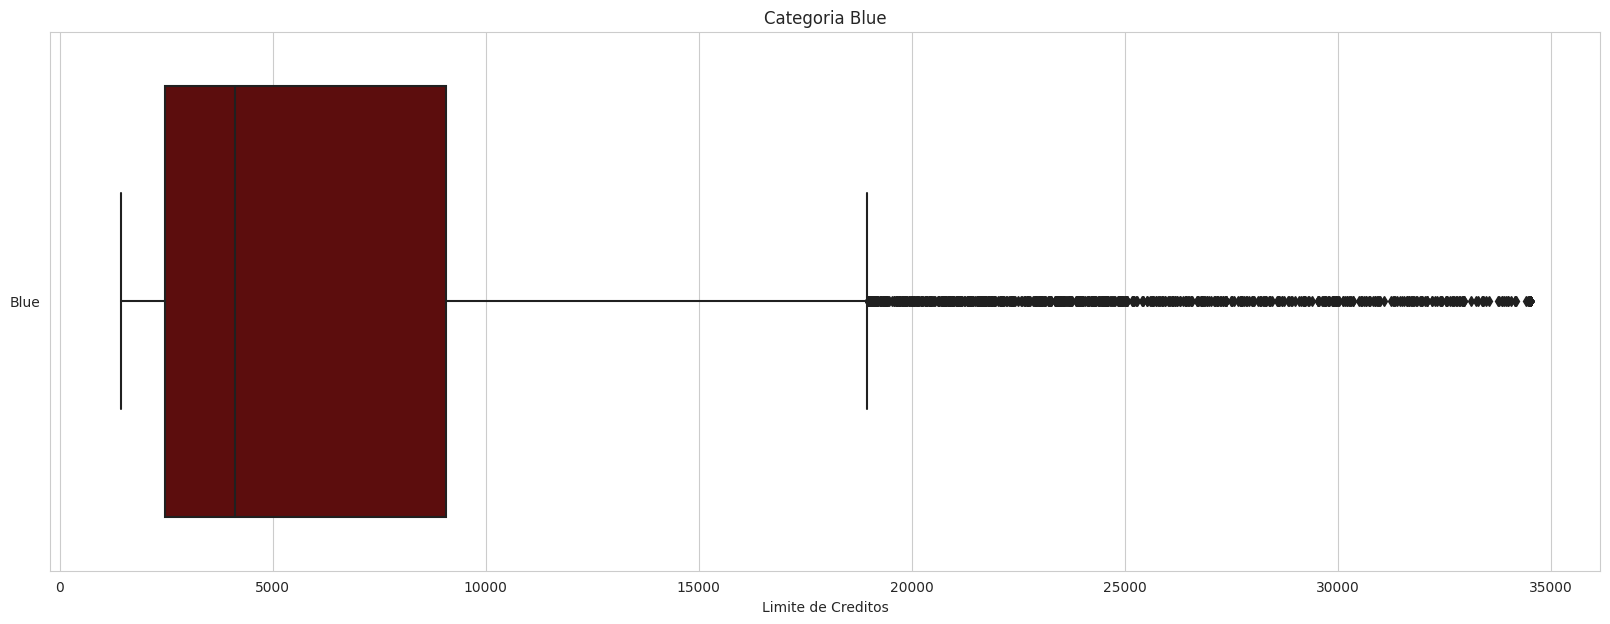

In [43]:
card_blue_20k = df[['Card_Ctg','State','Credit_Limit']].query('State == "Existing Customer"' and 'Card_Ctg == "Blue"')
v6 = fig, ax = plt.subplots(figsize=(20,7))
v6 = sns.boxplot(data = card_blue_20k , y = card_blue_20k['Card_Ctg'], x = card_blue_20k['Credit_Limit'], orient='h')
v6 = ax.set_title('Categoria Blue')
v6 = ax.set_xlabel('Limite de Creditos')
v6 = ax.set_ylabel('')

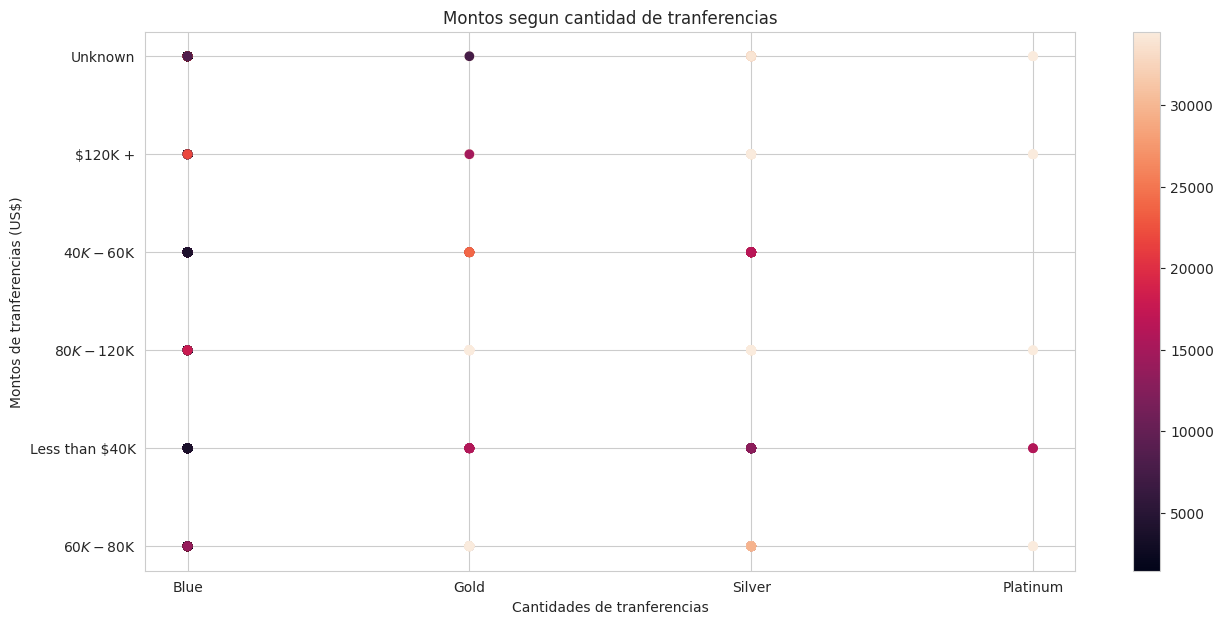

In [44]:
card_inc_cred = df[['State','Card_Ctg','Income','Credit_Limit']].query('State == "Existing Customer"')
v7 = fig, ax = plt.subplots(figsize=(15,7))
v7 = mapeo = ax.scatter(y = card_inc_cred['Income'], x = card_inc_cred['Card_Ctg'], c = card_inc_cred.Credit_Limit)
v7 = fig.colorbar(mapeo)
v7 = ax.set_title('Montos segun cantidad de tranferencias')
v7 = ax.set_xlabel('Cantidades de tranferencias')
v7 = ax.set_ylabel('Montos de tranferencias (US$)')
v7 = plt.show()

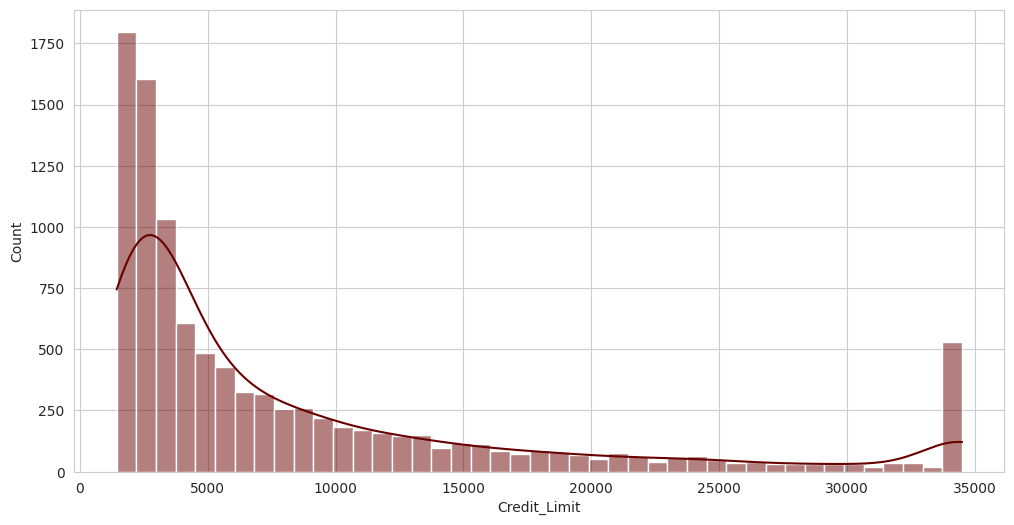

In [45]:
plt.figure(figsize=(12,6))
sns.set_palette('hot')
sns.histplot(x='Credit_Limit',data=df,kde=True);


Observaciones 

*   Los clientes que contienen categoria Blue y tienen Limites mayores a 18000 pueden acceder a categoria Silver.
*   Para pertenecer a categorias como Platinum se necesita ingresos mayores a 80k.
 


###Potencial abandono.
En nuestra base de dato tenes informacion de clientes "desgastados", donde esos clientes abandonaron la tarjeta por algun motivo, en base a estos datos que tenemos averiguaremos cuales son los clientes de potencial abandono, con el fin de no perder mas clientes y ofrecerles mejores propuestas. El estudio se hara utilizando variables como categorias, limites, cantidades de transacciones, apertura promedio de compra, y con los datos demograficos edad y genero.


Preguntas de interes:
1. Cuales clientes son de potencial abandono? Que beneficios se les puede aplicar?
2.	Los clientes que abandonan, que porcentaje son de blue, silver, gold, platinum?


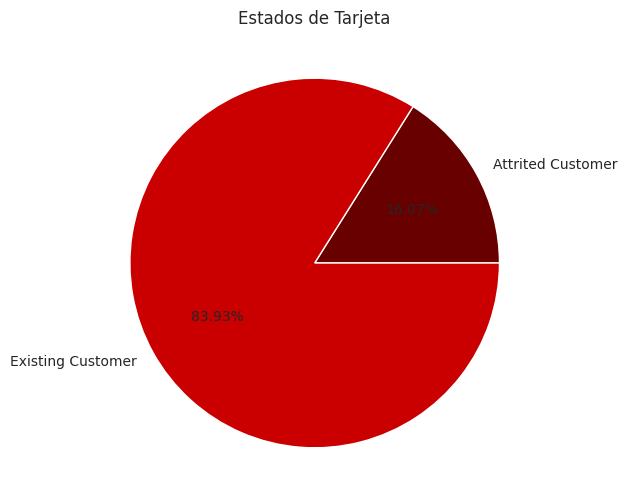

In [46]:
exist_aban = df.groupby(['State'])['Client'].count().to_frame().reset_index()
exist_aban
v8 = fig, ax = plt.subplots(figsize=(13,6))
v8 = plt.pie(exist_aban.Client.values, labels= exist_aban.State, autopct='%1.2f%%')
v8 = ax.set_title('Estados de Tarjeta')

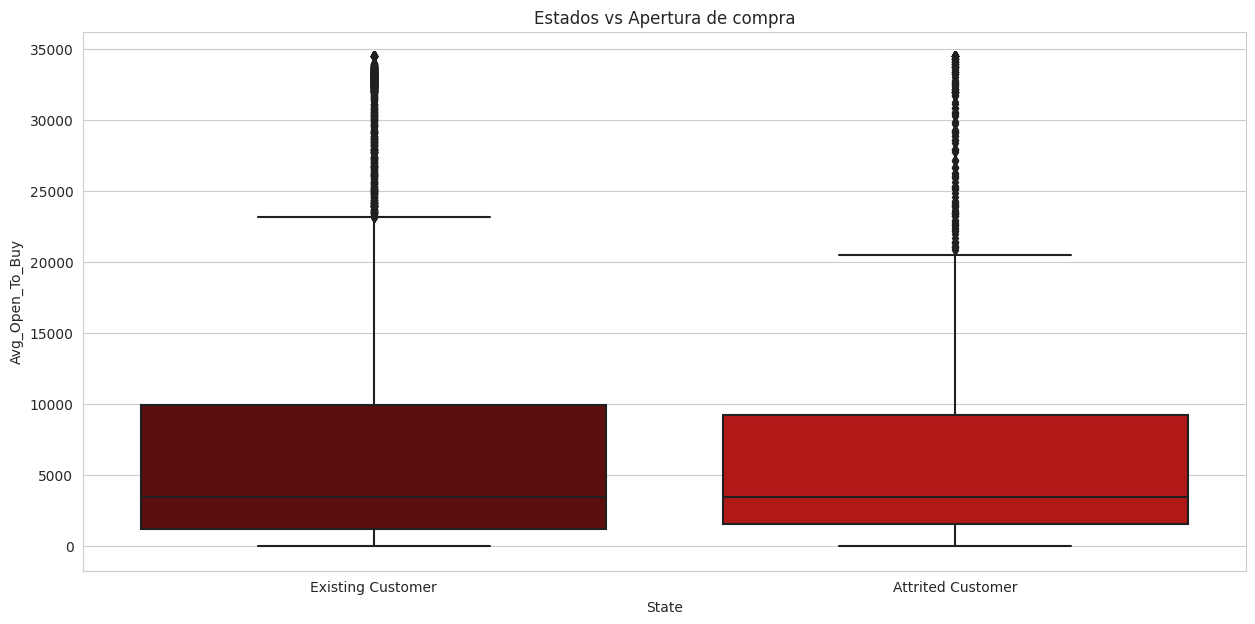

In [47]:
exist_aban_compl = df[['State', 'Age', 'Gender', 'Avg_Open_To_Buy','Edu_Lvl', 'Months_on_book']]
v9 = fig, ax = plt.subplots(figsize=(15,7))
v9 = sns.boxplot(data=exist_aban_compl , y = exist_aban_compl['Avg_Open_To_Buy'], x = exist_aban_compl['State'])
v9 = ax.set_title('Estados vs Apertura de compra')

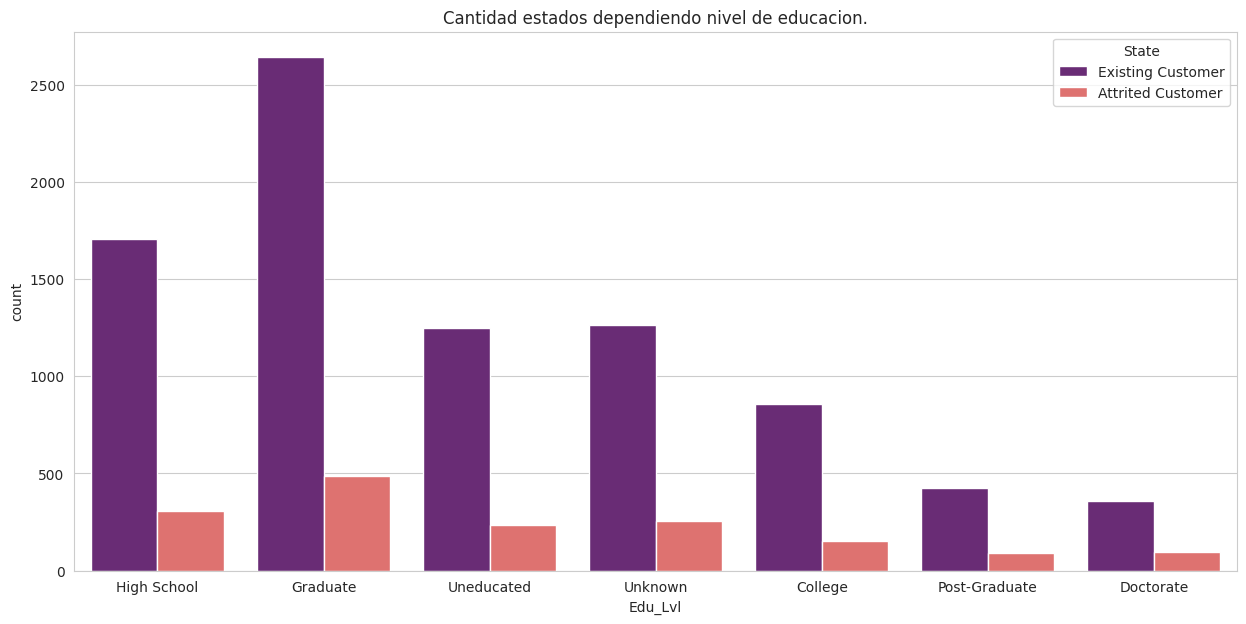

In [48]:
v10 = fig, ax = plt.subplots(figsize=(15,7))
v10 = sns.countplot(x='Edu_Lvl', data = exist_aban_compl, palette='magma', hue='State')
v10 = ax.set_title('Cantidad estados dependiendo nivel de educacion.')

Realice graficos pero en ningunos se divisa una clara diferencia entre los clientes existentes y los clientes que abanadonaron o fueron desgastados. Con el avnase del curso utilizare metedos mas exhaustivo para diferenciarlos.



##Preparando tablas para ML





In [49]:
from sklearn.preprocessing import StandardScaler

# Drop feature yang tidak diperlukan
df = df.drop(['Client'], axis=1)
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})

# Tranform Categorical Feature
df = pd.get_dummies(df, columns=['Edu_Lvl', 'Mari_Status', 'Income', 'Card_Ctg'], drop_first=True)
df

,State,Age,Gender,Depen_Cnt,Months_on_book,Ttl_Relat_Cnt,Month_Inac,Contac_Cnt,Credit_Limit,Ttl_Revol,...,Mari_Status_Single,Mari_Status_Unknown,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Income_Unknown,Card_Ctg_Gold,Card_Ctg_Platinum,Card_Ctg_Silver
0,Existing Customer,45,0,3,39,5,1,3,12691.0,777,...,0,0,0,1,0,0,0,0,0,0
1,Existing Customer,49,1,5,44,6,1,2,8256.0,864,...,1,0,0,0,0,1,0,0,0,0
2,Existing Customer,51,0,3,36,4,1,0,3418.0,0,...,0,0,0,0,1,0,0,0,0,0
3,Existing Customer,40,1,4,34,3,4,1,3313.0,2517,...,0,1,0,0,0,1,0,0,0,0
4,Existing Customer,40,0,3,21,5,1,0,4716.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,0,2,40,3,2,3,4003.0,1851,...,1,0,1,0,0,0,0,0,0,0
10123,Attrited Customer,41,0,2,25,4,2,3,4277.0,2186,...,0,0,1,0,0,0,0,0,0,0
10124,Attrited Customer,44,1,1,36,5,3,4,5409.0,0,...,0,0,0,0,0,1,0,0,0,0
10125,Attrited Customer,30,0,2,36,4,3,3,5281.0,0,...,0,1,1,0,0,0,0,0,0,0


#Modelo

<Figure size 1600x800 with 0 Axes>

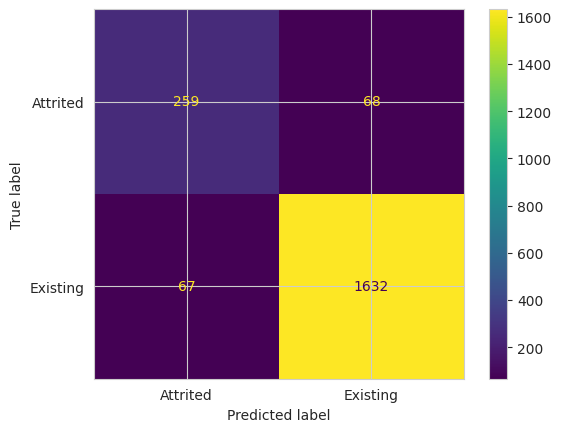

In [50]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import plot_confusion_matrix

X = df.drop('State', axis=1)  # Características
y = df['State']  # Variable objetivo

#Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Future Selection.
selector = SelectPercentile(chi2, percentile=50)
X_train_selected = selector.fit_transform(X_train, y_train)

#Modelo y entrenamiento.
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_selected, y_train)

#predicciones.
X_test_selected = selector.transform(X_test)
y_pred = dt.predict(X_test_selected)

#Grafica 
plt.figure(figsize=(16,8)) 
ConfusionMatrixDisplay.from_estimator(dt, X_test_selected, y_test, display_labels=['Attrited', 'Existing'])
plt.show()

In [51]:
print('Accuracy Score (Decision Tree):', accuracy_score(y_test, y_pred))
print('Evaluation Report (Decision Tree):\n', classification_report(y_test, y_pred))
print('Confusion Matrix (Decision Tree):\n', confusion_matrix(y_test, y_pred))

Accuracy Score (Decision Tree): 0.9333662388943732
Evaluation Report (Decision Tree):
                    precision    recall  f1-score   support

Attrited Customer       0.79      0.79      0.79       327
Existing Customer       0.96      0.96      0.96      1699

         accuracy                           0.93      2026
        macro avg       0.88      0.88      0.88      2026
     weighted avg       0.93      0.93      0.93      2026

Confusion Matrix (Decision Tree):
 [[ 259   68]
 [  67 1632]]


Podemos observar que el Modelo es bueno, se equivoca en un 6 % como obserbamos en accuracy, para la clase Existing la detecta en un 96%, y para la clase de Attrited lo detencta en un 79%, es menos eficiente para dichas clases.
EL modelo cuando detecta un caso de Existing es mas acertero con un 96% de seguridad contra un 79% de seguridad al detectar un Attrited.